Challenge Description

Company XYZ sells a software for $39. Since revenue has been flat for some time, the VP of
Product has decided to run a test increasing the price. She hopes that this would increase
revenue. In the experiment, 66% of the users have seen the old price ($39), while a random
sample of 33% users a higher price ($59).

The test has been running for some time and the VP of Product is interested in understanding
how it went and whether it would make sense to increase the price for all the users.
Especially he asked you the following questions:
Should the company sell its software for $39 or $59?

The VP of Product is interested in having a holistic view into user behavior, especially
focusing on actionable insights that might increase conversion rate. What are your main
findings looking at the data?

[Bonus] The VP of Product feels that the test has been running for too long and he should
have been able to get statistically significant results in a shorter time. Do you agree with
her intuition? After how many days you would have stopped the test? Please, explain
why.

### Data preparation and data cleaning

In [2]:
import pandas as pd

file1_name = 'test_results.csv'
file2_name = 'user_table.csv'
df_test = pd.read_csv(file1_name, parse_dates = ['timestamp'])
df_test.head()

,num,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,5/8/2015 3:38,ads_facebook,mobile,iOS,0,39,0
1,1,624057,5/10/2015 21:08,seo-google,mobile,android,0,39,0
2,2,317970,4/4/2015 15:01,ads-bing,mobile,android,0,39,0
3,3,685636,5/7/2015 7:26,direct_traffic,mobile,iOS,1,59,0
4,4,820854,5/24/2015 11:04,ads_facebook,web,mac,0,39,0


In [3]:
df_user = pd.read_csv(file2_name)
df_user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 9 columns):
num                 316800 non-null int64
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316488 non-null object
device              316800 non-null object
operative_system    296461 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(5), object(4)
memory usage: 21.8+ MB


In [13]:
df_test.isnull().sum()

num                     0
user_id                 0
timestamp               0
source                312
device                  0
operative_system    20339
test                    0
price                   0
converted               0
dtype: int64

In [14]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [18]:
df_test.price.min() ,df_test.price.max()

(39, 999884279)

Some of items in the price column is not $39 ro $59. need to clean them up.

In [22]:
#clean item with wrong price
df_test=df_test[df_test['price'] < 100]
df_test.price.max()

59

In [23]:
df_test.timestamp.min(), df_test.timestamp.max()

('2015-03-04 12:60:60', 'nan')

In [24]:
df_test.describe()

,num,user_id,test,price,converted
count,313726.000000,313726.000000,313726.000000,313726.000000,313726.000000
mean,158407.684224,499310.967401,0.359945,46.202400,0.018325
std,91450.329426,288608.449903,0.479985,9.600715,0.134124
min,0.000000,3.000000,0.000000,39.000000,0.000000
25%,79210.250000,249495.250000,0.000000,39.000000,0.000000
50%,158410.500000,499200.000000,0.000000,39.000000,0.000000
75%,237619.750000,749063.000000,1.000000,59.000000,0.000000
max,316799.000000,1000000.000000,1.000000,59.000000,1.000000


In [25]:
df_user.describe()

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


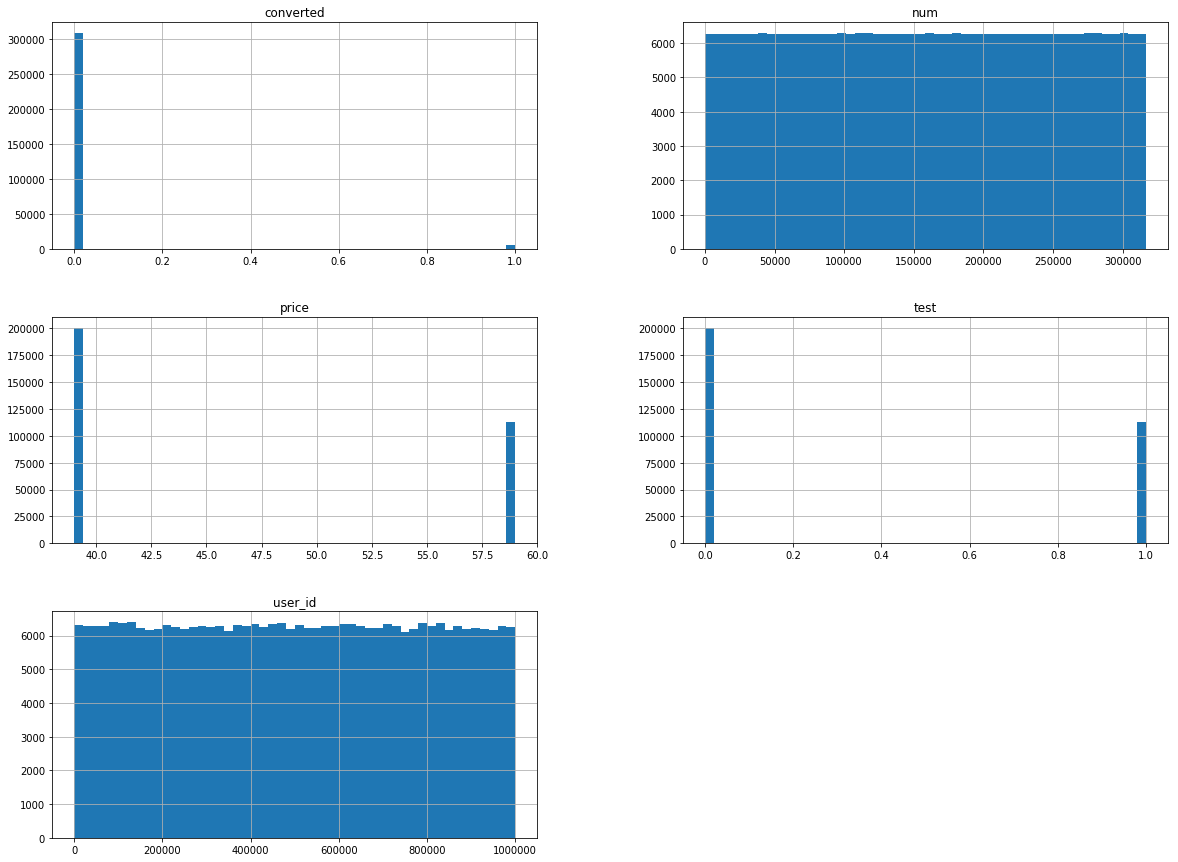

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
df_test.hist(bins=50, figsize = (20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

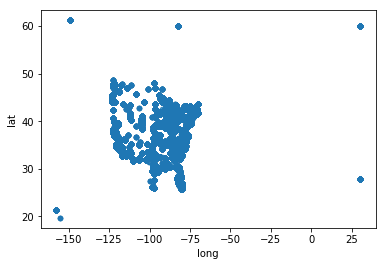

In [28]:
df_user.plot(kind="scatter",x="long",y="lat",alpha = 0.2)
plt.savefig('6_map1.png')

In [32]:
df_all =pd.merge(left = df_test, right=df_user, how = 'left', on='user_id')
df_all.head()

,num,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,0,604839,5/8/2015 3:38,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,1,624057,5/10/2015 21:08,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,2,317970,4/4/2015 15:01,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,3,685636,5/7/2015 7:26,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,4,820854,5/24/2015 11:04,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


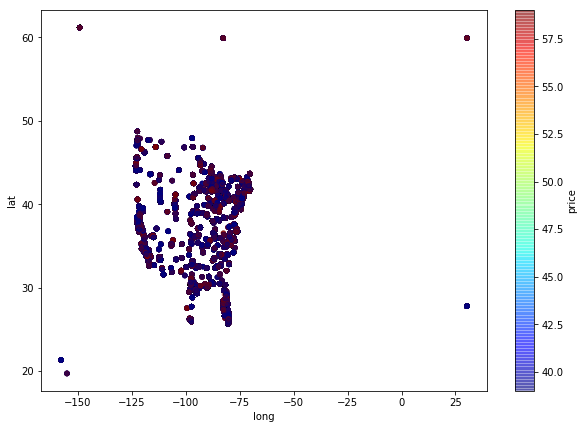

In [35]:
df_all.plot(kind="scatter",x="long",y="lat",alpha = 0.4, figsize=(10,7),c="price",cmap = plt.get_cmap("jet"),colorbar = True, sharex=False)

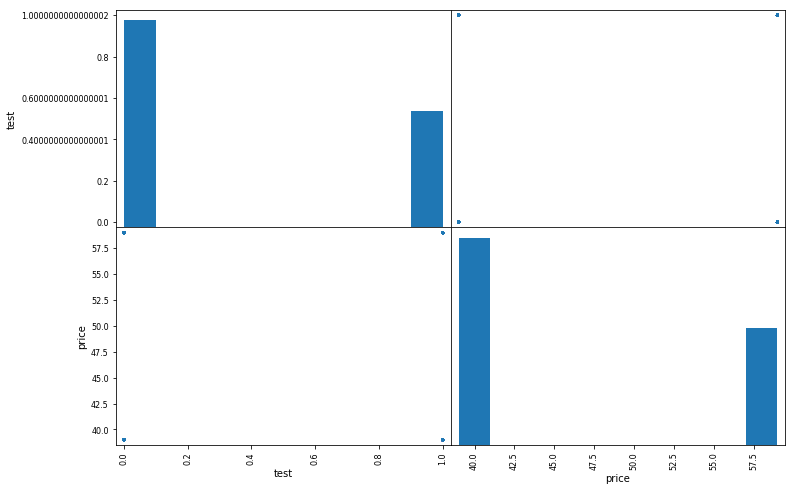

In [36]:
from pandas.plotting import scatter_matrix
attributes = ["test", "price"]
scatter_matrix(df_all[attributes],figsize = (12,8))
plt.savefig('6_matrix.png')

Plot shows some dots at (test=1, price =39) and (test=0,price=59). It means there is some mismatch for test group and price group. Need to clean up them.

In [56]:
df_all =pd.merge(left = df_test, right=df_user, how = 'left', on='user_id')
mask1 = (df_all['test']==1) & (df_all['price']==59)
mask2= (df_all['test'] == 0) & (df_all['price']==39)
df_all = df_all[mask1 | mask2 ]


In [91]:
df_all['operative_system'] = df_all['operative_system'].str.replace("i0S","iOS")
df_all['operative_system'] = df_all['operative_system'].str.replace("anriod","android")
df_all['operative_system'] = df_all['operative_system'].str.replace("wnddows","windows")

### Data Analysis

1. Should the company sell its software for $39 or $59?

to calculate the conversion rate for group $39 and group $59

In [57]:
group1=df_all[['price','converted']].groupby('price')
group1['converted'].value_counts()

price  converted
39     0            196604
       1              3989
59     0            111016
       1              1754
Name: converted, dtype: int64

In [55]:
conversion_rate =df_all[['price','converted']].groupby('price').mean()
conversion_rate

,converted
price,
39,0.019886
59,0.015554


In average,
for group of $39, revenue per user = $39*conversion_rate = $39 * 3989/196604 = $0.79
for group of $59, revenue per user = $59*conversion_rate = $59 * 1754/111016 = $0.93

Nest step is to test the significant of the reveune difference between group of $39 and group of $59


In [59]:
# create new column named `revenue`
df_all['revenue'] = df_all['converted'] * df_all['price']
df_all.head()

,num,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,0,604839,5/8/2015 3:38,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,1,624057,5/10/2015 21:08,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,2,317970,4/4/2015 15:01,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,3,685636,5/7/2015 7:26,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,4,820854,5/24/2015 11:04,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0


In [61]:
df_all[['price', 'revenue']].groupby('price').mean()


,revenue
price,
39,0.775555
59,0.917673


In [65]:
from scipy.stats import ttest_ind
contrl_group = df_all[df_all['test'] == 0]['revenue'].values
treat_group=df_all[df_all['test']==1]['revenue'].values

print(ttest_ind(contrl_group, treat_group, axis=0,equal_var=False))


Ttest_indResult(statistic=-5.70555247970994, pvalue=1.1614335465514394e-08)


Null hypothesis Ho: revenue_contrl = revenue_treat
Alternative hypothesis hl: revenue_contrl != revenue_treat

Ran above 2-tail t-test,the t-value shows we can reject Ho. With the low pvalue, I can conclude that we can accept the 1-tail hl: revenue_contrl < revenue_treat with 95% confidence level as well.

In conclusion, company should choose $59 price, as it generated more revenue from the same user size.

2. Actionable insights that might increase conversion rate. 

In [67]:
group2=df_all[['source','converted']].groupby('source')
group2['converted'].value_counts()

source           converted
ads-bing         0            22300
                 1              271
ads-google       0            57440
                 1             1265
ads-yahoo        0             7388
                 1              111
ads_facebook     0            51639
                 1             1113
ads_other        0            29095
                 1              427
direct_traffic   0            58912
                 1              738
friend_referral  0            19665
                 1              794
seo-bing         0             2071
                 1               51
seo-google       0            22524
                 1              385
seo-other        0             8993
                 1              144
seo-yahoo        0             6668
                 1              110
seo_facebook     0            20619
                 1              333
Name: converted, dtype: int64

In [68]:
conversion_rate2 =df_all[['source','converted']].groupby('source').mean()
conversion_rate2

,converted
source,
ads-bing,0.012007
ads-google,0.021548
ads-yahoo,0.014802
ads_facebook,0.021099
ads_other,0.014464
direct_traffic,0.012372
friend_referral,0.038809
seo-bing,0.024034
seo-google,0.016806


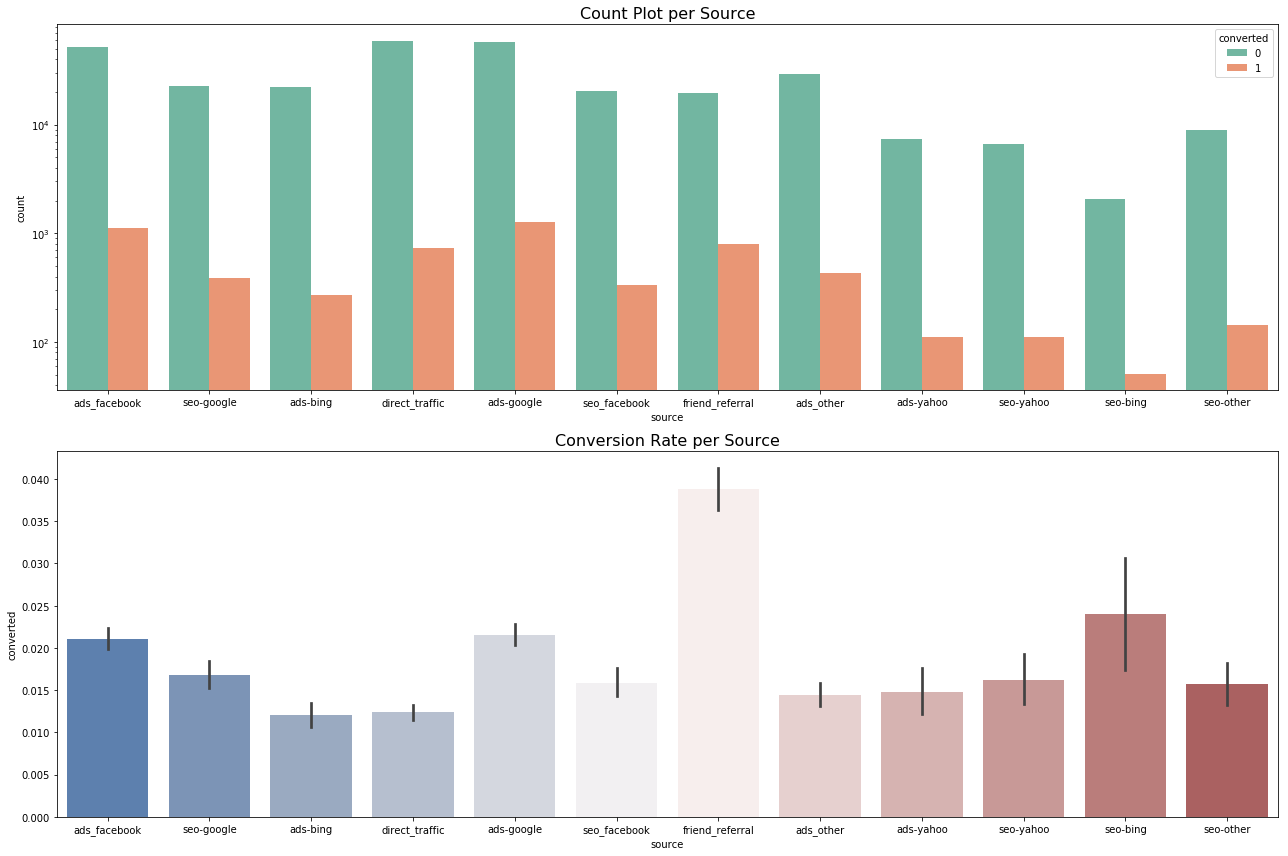

In [80]:
import seaborn as sns
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(18,12))
sns.countplot(x='source',hue='converted',data=df_all,ax=ax[0],palette="Set2")
ax[0].set_title('Count Plot per Source',fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source',y='converted',data=df_all,ax=ax[1],palette="vlag")
ax[1].set_title('Conversion Rate per Source',fontsize=16)
plt.tight_layout()
plt.show()


Among all the source channel,friend referral has highest conversion rate. 

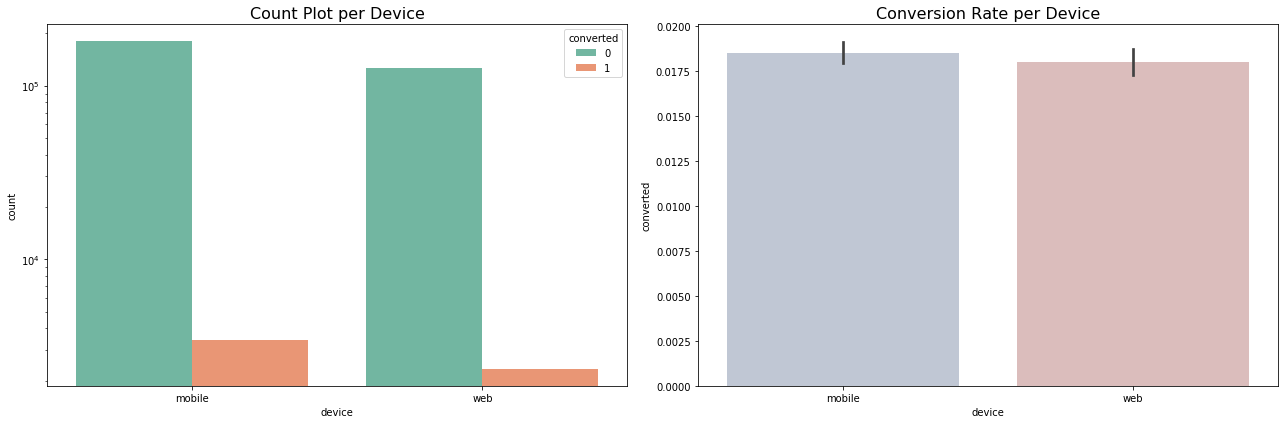

In [85]:

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='device',hue='converted',data=df_all,ax=ax[0],palette="Set2")
ax[0].set_title('Count Plot per Device',fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='device',y='converted', data=df_all,ax=ax[1],palette="vlag")
ax[1].set_title('Conversion Rate per Device',fontsize=16)
plt.tight_layout()
plt.show()


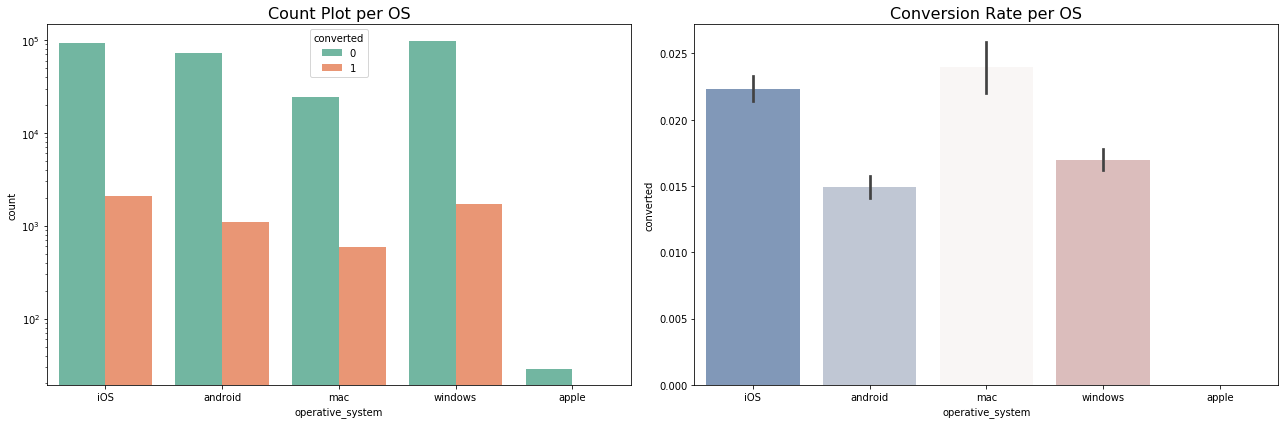

In [90]:
df_all['operative_system'] = df_all['operative_system'].str.replace("i0S","iOS")
df_all['operative_system'] = df_all['operative_system'].str.replace("anroid","android")
df_all['operative_system'] = df_all['operative_system'].str.replace("wnddows","windows")
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='operative_system',hue='converted',data=df_all,ax=ax[0],palette="Set2")
ax[0].set_title('Count Plot per OS',fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='operative_system',y='converted',data=df_all,ax=ax[1],palette="vlag")
ax[1].set_title('Conversion Rate per OS',fontsize=16)
plt.tight_layout()
plt.show()

Above data shows Apple (iOS and mac) user has higher conversion rate.

In [107]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(240,120))
sns.countplot(x='city',hue='converted',data=df_all,ax=ax[0],palette="Set2")
ax[0].set_title('Count Plot per city',fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='city',y='converted',data=df_all,ax=ax[1],palette="vlag")
ax[1].set_title('Conversion Rate per city',fontsize=16)
plt.tight_layout()
plt.show()

In [101]:
conversion_rate3 =df_all[['city','lat','long','converted']].groupby('city').mean().sort_values(by='converted',ascending=False)
conversion_rate3

,lat,long,converted
city,,,
North Atlanta,33.86,-84.33,0.200000
Catonsville,39.26,-76.74,0.153846
Saint Charles,38.79,-90.52,0.142857
Parkway-South Sacramento,38.51,-121.45,0.117647
Findlay,41.04,-83.64,0.111111
Blue Springs,39.02,-94.27,0.105263
Bonita Springs,26.34,-81.79,0.090909
Lehigh Acres,26.60,-81.63,0.086957
Parsippany-Troy Hills Township,40.86,-74.42,0.081081


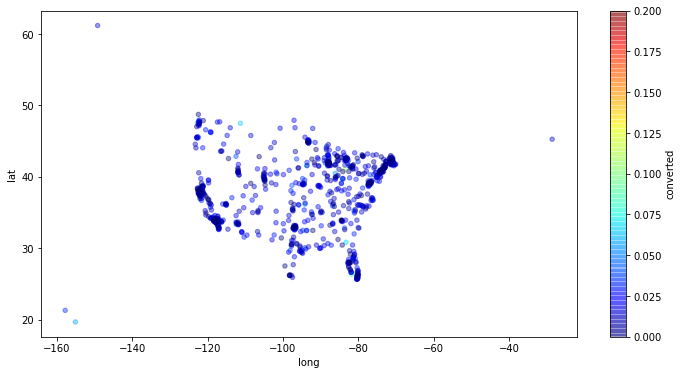

In [106]:
conversion_rate3.plot(kind="scatter",x="long",y="lat",alpha = 0.4, figsize=(12,6),c="converted",cmap = plt.get_cmap("jet"),colorbar = True, sharex=False)

South area has higher conversion rate.

In conclusion,price, operative system, locations are key factors on conversion rate. To increase the overall converstion rate, company can strategicly 1) increase the users in the high conversion rate category.
2) for the users in the lower conversion rate, find the root cause to server them better and lift the conversion rate.

To be specific,the action item could be 
1) encouraging users the refer their friends, 
2) decrease in price are the method, 
3) promotion targeting apple users, 
4) focus group on android users to understand their need better, and improve the product.
5) focus group on users in coastal area, and improve the product to meet their need.

3. [Bonus] The VP of Product feels that the test has been running for too long and he should
have been able to get statistically significant results in a shorter time. Do you agree with
her intuition? After how many days you would have stopped the test? Please, explain
why.

group 0, price =$39, mean_rev = 0.776, stdev=5.44, n=200593
group 1, price =$59, mean_rev = 0.918, stdev=7.30, n=112652

sigma0！=sigma1, freedom degree = 183905

Assumption:
1)　alpha=5% => t-stat = -1.645
2) lift = -0.2

==> sample size = 11226.05 ~ 11228

if distribute users to group 0 /group 1 50:50, it needs the lest sample size, and therefore testing time.
so N_group0 =5614, N_group1=5614.

It use 5 weeks to get 313245 user visitor, by the same pattern, it need around 2 weeks to get 11228 visitors.